In [2]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
uploaded = files.upload()

Saving training_titanic_x_y_train.csv to training_titanic_x_y_train.csv
Saving test_titanic_x_test.csv to test_titanic_x_test.csv


In [6]:
Train = pd.read_csv("training_titanic_x_y_train.csv")
Test = pd.read_csv("test_titanic_x_test.csv")
Train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [7]:
Test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [8]:
Train.drop(["Name","Ticket"],axis=1,inplace=True)
Test.drop(["Name","Ticket"],axis=1,inplace=True)

In [9]:
def Male(X) :
    if X == "male" :
        return 1
    else :
        return 0

def Female(Y) :
    if Y == "female" :
        return 1
    else :
        return 0

In [10]:
Train['Male'] = Train.Sex.apply(Male)
Test['Male'] = Test.Sex.apply(Male)
Train['Female'] = Train.Sex.apply(Female)
Test['Female'] = Test.Sex.apply(Female)

In [11]:
Train.drop(["Sex"], axis=1, inplace=True)
Test.drop(["Sex"], axis=1, inplace=True)
Train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Male,Female
0,2,29.0,1,0,26.000,NaN,S,1,0,1
1,3,NaN,0,0,8.050,NaN,S,0,1,0
2,2,39.0,0,0,26.000,NaN,S,0,1,0
3,3,29.0,0,4,21.075,NaN,S,0,0,1
4,3,25.0,0,0,7.050,NaN,S,0,1,0


In [12]:
def Cherbourg(s):
    if s=="C":
        return 1
    else:
        return 0
    
def Queenstown(s):
    if s=="Q":
        return 1
    else:
        return 0

def Southamptom(s):
    if s=="S":
        return 1
    else:
        return 0

In [13]:
Train["Cherbourg"] = Train.Embarked.apply(Cherbourg)
Train["Queenstown"] = Train.Embarked.apply(Queenstown)
Train["Southamptom"] = Train.Embarked.apply(Southamptom)
Train.drop("Embarked",axis=1, inplace=True)
Train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,29.0,1,0,26.000,NaN,1,0,1,0,0,1
1,3,NaN,0,0,8.050,NaN,0,1,0,0,0,1
2,2,39.0,0,0,26.000,NaN,0,1,0,0,0,1
3,3,29.0,0,4,21.075,NaN,0,0,1,0,0,1
4,3,25.0,0,0,7.050,NaN,0,1,0,0,0,1


In [14]:
Test["Cherbourg"] = Test.Embarked.apply(Cherbourg)
Test["Queenstown"] = Test.Embarked.apply(Queenstown)
Test["Southamptom"] = Test.Embarked.apply(Southamptom)
Test.drop("Embarked",axis=1, inplace=True)
Test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,8.0,1,1,36.7500,NaN,1,0,0,0,1
1,1,49.0,0,0,25.9292,D17,0,1,0,0,1
2,3,NaN,0,0,7.7375,NaN,1,0,0,1,0
3,2,24.0,2,1,27.0000,NaN,0,1,0,0,1
4,1,36.0,0,0,26.2875,E25,1,0,0,0,1


In [15]:
def Cabin(x):
    if x is np.nan:
        return 0
    else:
        return 1

In [16]:
Train['Cabin'] = Train.Cabin.apply(Cabin)
Test['Cabin'] = Test.Cabin.apply(Cabin)
Train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,29.0,1,0,26.000,0,1,0,1,0,0,1
1,3,NaN,0,0,8.050,0,0,1,0,0,0,1
2,2,39.0,0,0,26.000,0,0,1,0,0,0,1
3,3,29.0,0,4,21.075,0,0,0,1,0,0,1
4,3,25.0,0,0,7.050,0,0,1,0,0,0,1


In [17]:
Train["Age"].fillna(Train["Age"].mean(),inplace=True)
Test["Age"].fillna(Test["Age"].mean(),inplace=True)
Train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,29.00000,1,0,26.000,0,1,0,1,0,0,1
1,3,29.70056,0,0,8.050,0,0,1,0,0,0,1
2,2,39.00000,0,0,26.000,0,0,1,0,0,0,1
3,3,29.00000,0,4,21.075,0,0,0,1,0,0,1
4,3,25.00000,0,0,7.050,0,0,1,0,0,0,1


In [18]:
Train = Train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Cabin','Male','Female','Cherbourg','Queenstown','Southamptom','Survived']]
Train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom,Survived
0,2,29.00000,1,0,26.000,0,0,1,0,0,1,1
1,3,29.70056,0,0,8.050,0,1,0,0,0,1,0
2,2,39.00000,0,0,26.000,0,1,0,0,0,1,0
3,3,29.00000,0,4,21.075,0,0,1,0,0,1,0
4,3,25.00000,0,0,7.050,0,1,0,0,0,1,0


In [19]:
Train = Train.values
Train.shape

(668, 12)

In [20]:
X = Train[:, :-1]
Y = Train[:, -1]
X.shape, Y.shape

((668, 11), (668,))

In [21]:
Scaler = preprocessing.StandardScaler()
Scaler.fit(X)

StandardScaler()

In [22]:
X_Scaled = Scaler.transform(X)
X_Scaled.shape

(668, 11)

In [23]:
X_Scaled = np.append(X_Scaled,np.ones(X_Scaled.shape[0]).reshape(-1,1),axis=1)
X_Scaled.shape,X_Scaled[0].shape

((668, 12), (12,))

In [24]:
def Sigmoid(Aggregate):  
    return 1/(1+np.exp(-Aggregate))


def Cost_Function(X_train, Y_train, m):
    Cost = 0
    N = X_train.shape[0]
    
    for i in range(N):
        Aggregate = (X_train[i]*m).sum()
        h = Sigmoid(Aggregate)
        cost = -Y_train[i]*np.log(h) - (1-Y_train[i])*np.log(1-h)
        Cost += cost
    return Cost


def Step_Gradient(X_train, Y_train, lr, m):
    N = X_train.shape[0]
    slope_m = np.zeros(X_train.shape[1])

    for i in range(N):
        Aggregate = (X_train[i]*m).sum()
        h = Sigmoid(Aggregate)
        slope_m+=(-1/N)*(Y_train[i]-h)*X_train[i]  
    m = m - lr*slope_m
    return m


def fit(X_train, Y_train, epochs=100, lr=0.01): 
    m = np.zeros(X_train.shape[1])
    Cost_Array = []
    unit = epochs//10

    for i in range(epochs+1):
        m = Step_Gradient(X_train,Y_train,lr,m)
        Cost = Cost_Function(X_train, Y_train, m)
        Cost_Array.append(Cost)
        if i%unit==0:
            print("Epoch:{}, Cost:{}".format(i, Cost))
    return m,Cost_Array


def predict(X_test,m):   
    y_pred = []
    N = X_test.shape[0]

    for i in range(N):
        Aggregate = (X_test[i]*m).sum()
        h = Sigmoid(Aggregate)
        if h>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)         
    return np.array(y_pred)


def Accuracy(Y_test,Y_pred):
    correct = 0
    N = Y_test.shape[0]
    correct = (Y_test==Y_pred).sum()
    
    return (correct/N)*100

In [25]:
m, Cost_Array = fit(X_Scaled, Y, 3000, 1)
print(m)

Epoch:0, Cost:358.0752523245352
Epoch:300, Cost:301.4157746341175
Epoch:600, Cost:301.4131900260606
Epoch:900, Cost:301.41084277951836
Epoch:1200, Cost:301.4087021189541
Epoch:1500, Cost:301.4067423107614
Epoch:1800, Cost:301.40494168020206
Epoch:2100, Cost:301.4032818481148
Epoch:2400, Cost:301.4017471324668
Epoch:2700, Cost:301.4003240748897
Epoch:3000, Cost:301.3990010629445
[-0.74994126 -0.51700103 -0.33313735 -0.13140403  0.00626595  0.27418886
 -0.64603902  0.64603902 -0.12307504 -0.07261971 -0.28412106 -0.50913015]


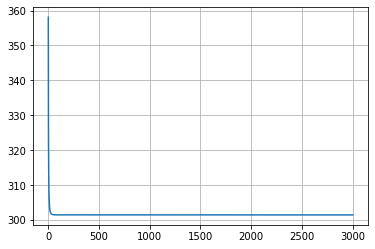

In [26]:
plt.plot(Cost_Array)
plt.grid()
plt.show()

In [27]:
Y_pred_train = predict(X_Scaled, m)
Accuracy(Y,Y_pred_train)

79.79041916167665

In [28]:
Test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,8.000000,1,1,36.7500,0,1,0,0,0,1
1,1,49.000000,0,0,25.9292,1,0,1,0,0,1
2,3,29.694775,0,0,7.7375,0,1,0,0,1,0
3,2,24.000000,2,1,27.0000,0,0,1,0,0,1
4,1,36.000000,0,0,26.2875,1,1,0,0,0,1


In [30]:
X_test = Test.values
X_test_scaled = Scaler.transform(X_test)
X_test_scaled.shape

(223, 11)

In [31]:
X_test_scaled = np.append(X_test_scaled,np.ones(X_test_scaled.shape[0]).reshape(-1,1),axis=1)

In [32]:
y_pred_test = predict(X_test_scaled,m)
np.savetxt('Predictions_Titanic.csv',y_pred_test)